In [21]:
import numpy as np
import matplotlib.pyplot as plt
from terrain import Nav2D
from cliff import Cliff
%matplotlib inline

def CVaR_policy(p, x, alpha, N=20, Vmax=20, Vmin=-20, nAtoms=51, nA=4):
    dz = (Vmax - Vmin)/(nAtoms-1)
    Z = np.arange(nAtoms) * dz + Vmin
    Q = np.zeros(nA)
    for a in range(nA):
        values = np.zeros(N)
        for n in range(N):
            tau = np.random.uniform(0, alpha)
            idx = np.argmax((np.cumsum(p[x, a, :]) > tau) * 1.0)
            z = Z[idx]
            values[n] = z
        Q[a] = np.mean(values)
    return Q

def read(name):
    p = np.load(name)
    return p

def calc_CVaR(returns, alpha):
    var = np.sort(returns[:])[int(len(returns[:]) * alpha)]
    idx = np.where(returns[:] <= var)
    CVaR = np.mean(returns[idx])
    return CVaR

def CVaR(p, wolrd, alpha, N=100, gamma=0.95):
    returns = np.zeros(N)
    for ep in range(N):
        o = world.reset()
        terminal = False
        ret = []
        while not terminal:
            a = np.argmax(CVaR_policy(p, o, alpha=alpha, nA = world.nA))
            no, r, terminal = world.step(a)
            ret.append(r)
            o = no
        tot_ret = 0
        for r in reversed(ret):
            tot_ret = r + gamma*tot_ret
        returns[ep] = tot_ret
    return calc_CVaR(returns, alpha)

def path(p, world, alpha):
    o = world.reset()
    path = []
    terminal = False
    path.append(world.current_state)
    step = 0
    while not terminal and step < 200:
        a = np.argmax(CVaR_policy(p, o, alpha=alpha, nA = world.nA))
        no, r, terminal = world.step(a)
        path.append(world.current_state)
        o = no
        step += 1
    return path

def draw(name, world, alpha):
    p = read(name)
    traj = path(p, world, alpha)
    matrix = world.obstacles
    matrix[world.goal_state] = -1
    matrix[world.initial_state] = 2
    for x, y in traj:
        plt.plot(x, y, '.', color = 'blue', markersize=5)
    plt.imshow(matrix.T)
    plt.title('CVaR at alpha=%g = %g'%(alpha, CVaR(p, world, alpha=alpha, N=100)))

def drawCliff(name, world, alpha):
    p = read(name)
    traj = path(p, world, alpha)
    matrix = np.zeros((world.maxX, world.maxY))
    for x, y  in world.cliff:
        matrix[x, y] = 1
    matrix[world.goal_state] = -1
    matrix[world.initial_state] = 2
    for x, y in traj:
        plt.plot(x, y, '.', color = 'blue', markersize=5)
    plt.imshow(matrix.T)
    plt.title('CVaR at alpha=%g = %g'%(alpha, CVaR(p, world, alpha=alpha, N=100)))

In [24]:
name = 'cliff_c51_p.npy'
world = Cliff(0.1, 10)

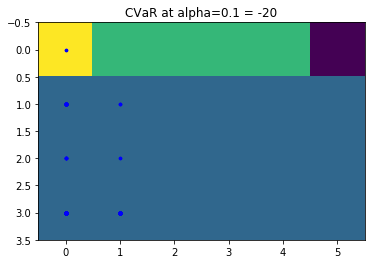

In [25]:
drawCliff(name, world, 0.1)

In [196]:
N = 1000; alpha = 0.25; gamma=0.95
returns = np.zeros(N)
for ep in range(N):
    o = world.reset()
    terminal = False
    ret = []
    while not terminal:
        a = 2
        no, r, terminal = world.step(a)
        ret.append(r)
        o = no
    tot_ret = 0
    for r in reversed(ret):
        tot_ret = r + gamma*tot_ret
    returns[ep] = tot_ret
    
print(np.mean(returns))
print(calc_CVaR(returns, alpha))

-13.701055378567657
-29.809286752857528
